In [13]:
from villas.dataprocessing.readtools import *
from villas.dataprocessing.timeseries import *
import numpy as np
import matplotlib.pyplot as plt
import re
import dpsimpy

%matplotlib widget

In [14]:
import os
import subprocess

#%matplotlib widget

name = 'EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init'

dpsim_path = subprocess.Popen(['git', 'rev-parse', '--show-toplevel'], stdout=subprocess.PIPE).communicate()[0].rstrip().decode('utf-8')

path_exec = dpsim_path + '/build/dpsim/examples/cxx/'
sim = subprocess.Popen([path_exec + name], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
print(sim.communicate()[0].decode())

[16:31:12.415464 PiLine warning] Zero value for Capacitance, setting default value of C=1e-12 [F]
[16:31:12.415578 PiLine warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[16:31:12.418767 EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_PF info] Initialize simulation: EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_PF
[16:31:12.419815 EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_PF_PF_Solver warning] No suitable quantity found for setting mBaseApparentPower. Using 100000000 VA.
[16:31:12.422250 EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_PF info] Scheduling tasks.
[16:31:12.423373 EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_PF info] Scheduling done.
[16:31:12.423382 EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_PF info] Opening interfaces.
[16:31:12.423383 EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_PF info] Start synchronization with remotes on interfaces

In [15]:
modelName = 'EMT_Slack_PiLine_VSI_VoltageControlled_LoadStep_with_PF_Init_EMT'
path = 'logs/' + modelName + '/'
dpsim_result_file = path + modelName + '.csv'
PEAK1PH_TO_RMS3PH = np.sqrt(3.0/2.0)
ts_dpsim = read_timeseries_csv(dpsim_result_file)
ts_dpsim_simulink = read_timeseries_csv('logs/pcc_transient_simulink.csv')
# ts_dpsim_v =  read_timeseries_csv('logs/voltage_pcc_simulink.csv')

column number: 14
results length: 10002
real column names: ['P_elec', 'Q_elec', 'Spannung_Node_2_0', 'Spannung_Node_2_1', 'Spannung_Node_2_2', 'Spannung_PCC_0', 'Spannung_PCC_1', 'Spannung_PCC_2', 'Spannung_Quelle_0', 'Spannung_Quelle_1', 'Spannung_Quelle_2', 'Strom_RLC_0', 'Strom_RLC_1', 'Strom_RLC_2']
complex column names: []
column number: 11
results length: 4607
real column names: ['Spannung_PCC_0', 'Spannung_PCC_1', 'Spannung_PCC_2', 'Current_PCC_0', 'Current_PCC_1', 'Current_PCC_2', 'Current_RLC_0', 'Current_RLC_1', 'Current_RLC_2', 'Wirkleistung_PCC', 'Blindleistung_PCC']
complex column names: []


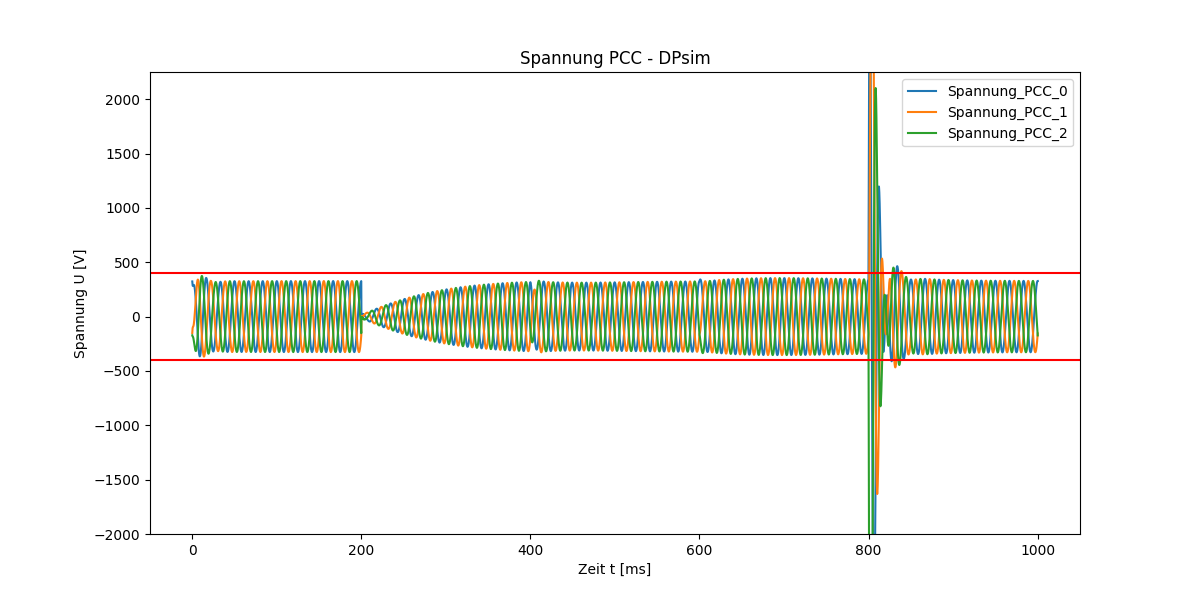

In [16]:
plt.figure(figsize=(12,6))
plt.title('Spannung PCC - DPsim')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Spannung U [V]')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['Spannung_PCC_0', 'Spannung_PCC_1', 'Spannung_PCC_2']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =400, color = 'r', linestyle = '-')
plt.axhline(y =-400, color = 'r', linestyle = '-')
plt.ylim(-2000,2250)
plt.legend()
plt.show()

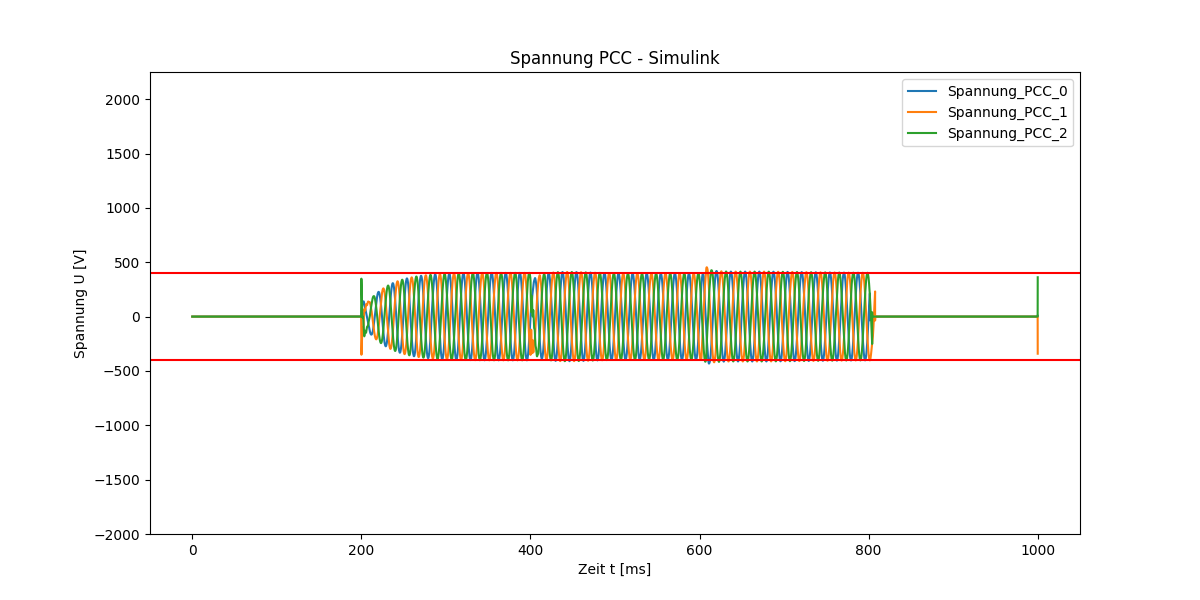

In [17]:
plt.figure(figsize=(12,6))
plt.title('Spannung PCC - Simulink')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Spannung U [V]')
for ts_name, ts_obj  in ts_dpsim_simulink.items():
    if ts_name in ['Spannung_PCC_0', 'Spannung_PCC_1', 'Spannung_PCC_2']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =400, color = 'r', linestyle = '-')
plt.axhline(y =-400, color = 'r', linestyle = '-')
plt.ylim(-2000,2250)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


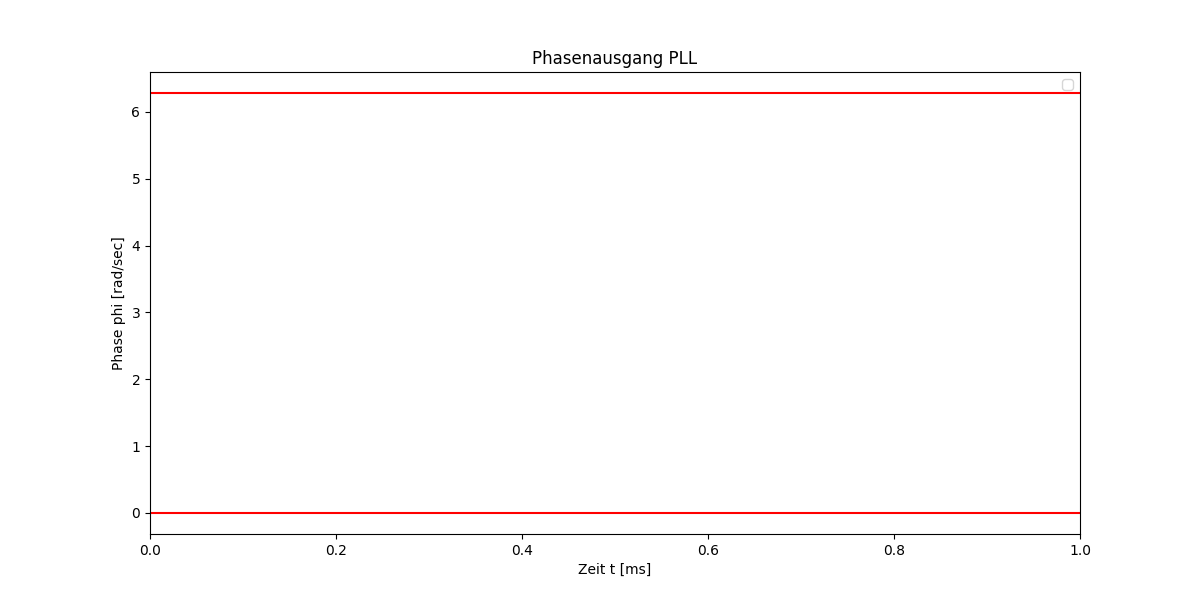

In [18]:
plt.figure(figsize=(12,6))
plt.title('Phasenausgang PLL')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Phase phi [rad/sec]')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['VCO_Phase']:
        plt.plot(1000*ts_obj.time, (ts_obj.values)%(6.28319), label=ts_name)
plt.axhline(y =0, color = 'r', linestyle = '-')
plt.axhline(y =6.28319, color = 'r', linestyle = '-')
plt.legend()
plt.show()

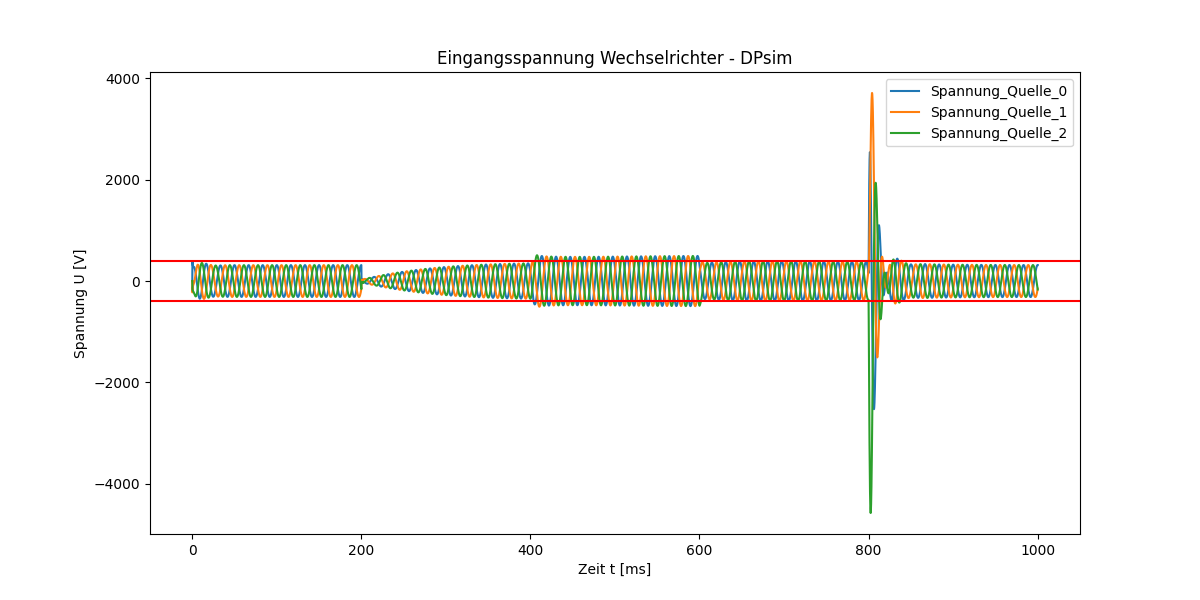

In [19]:
plt.figure(figsize=(12,6))
plt.title('Eingangsspannung Wechselrichter - DPsim')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Spannung U [V]')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['Spannung_Quelle_0','Spannung_Quelle_1','Spannung_Quelle_2']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =400, color = 'r', linestyle = '-')
plt.axhline(y =-400, color = 'r', linestyle = '-')
plt.legend()
plt.show()

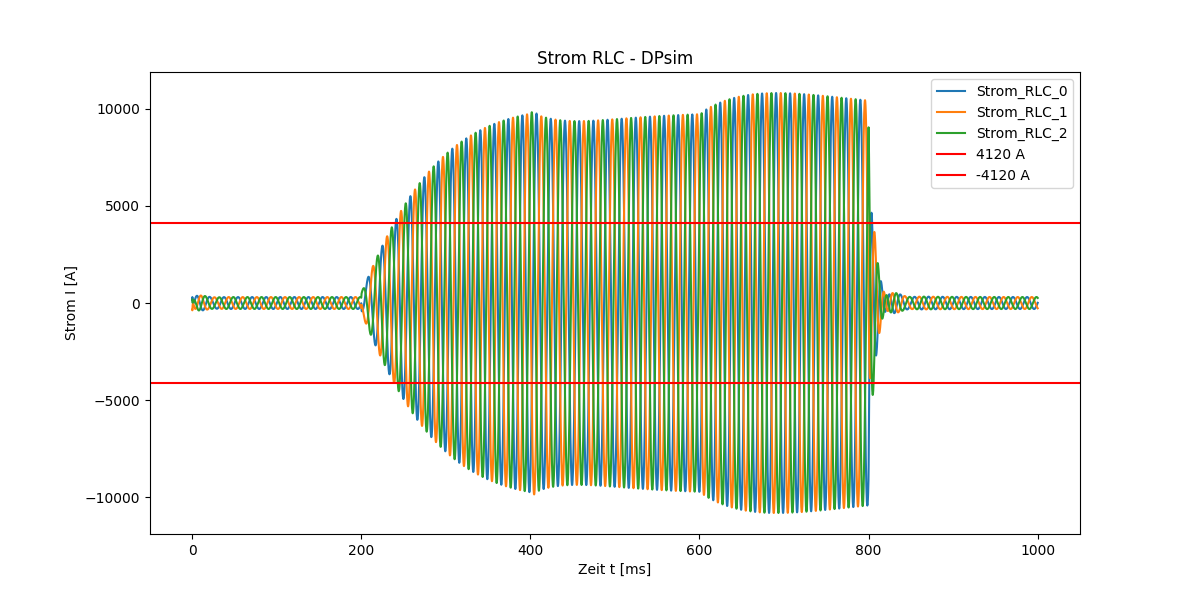

In [20]:
plt.figure(figsize=(12,6))
plt.title('Strom RLC - DPsim')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Strom I [A]')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['Strom_RLC_0','Strom_RLC_1','Strom_RLC_2']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =4120, color = 'r', linestyle = '-',label='4120 A')
plt.axhline(y =-4120, color = 'r', linestyle = '-',label='-4120 A')
plt.legend()
plt.show()

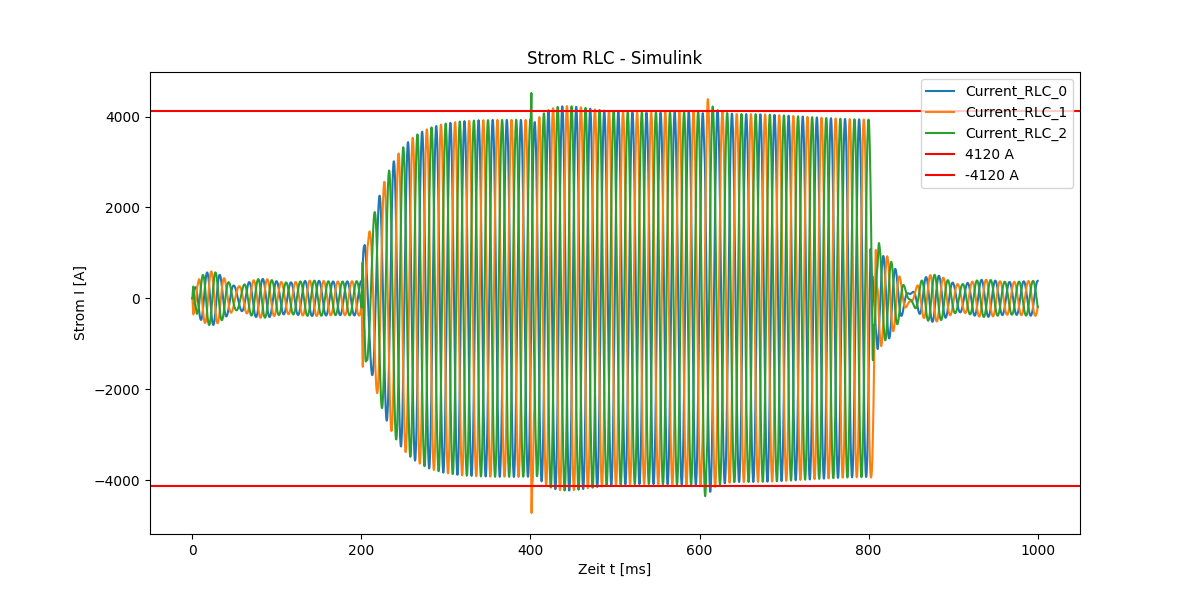

In [21]:
plt.figure(figsize=(12,6))
plt.title('Strom RLC - Simulink')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Strom I [A]')
for ts_name, ts_obj  in ts_dpsim_simulink.items():
    if ts_name in ['Current_RLC_0','Current_RLC_1','Current_RLC_2']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =4120, color = 'r', linestyle = '-',label='4120 A')
plt.axhline(y =-4120, color = 'r', linestyle = '-',label='-4120 A')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


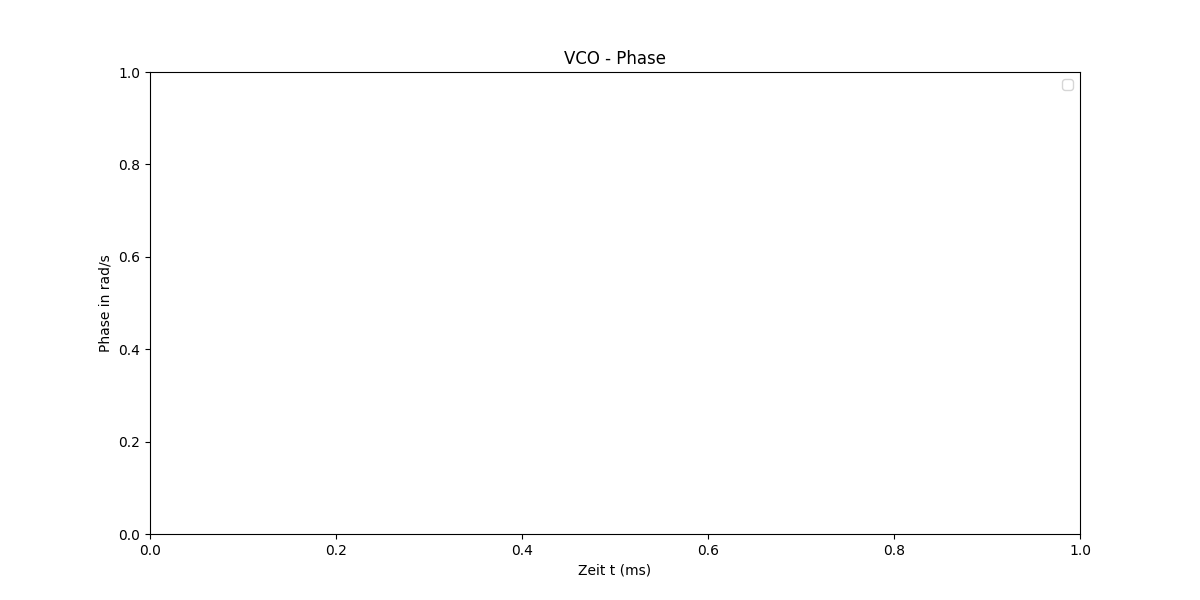

In [22]:
plt.figure(figsize=(12,6))
plt.title('VCO - Phase')
plt.xlabel('Zeit t (ms)')
plt.ylabel('Phase in rad/s')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['VCO_Phase']:
        plt.plot(1000*ts_obj.time, ts_obj.values % 6.283, label=ts_name)

plt.legend()
plt.show()


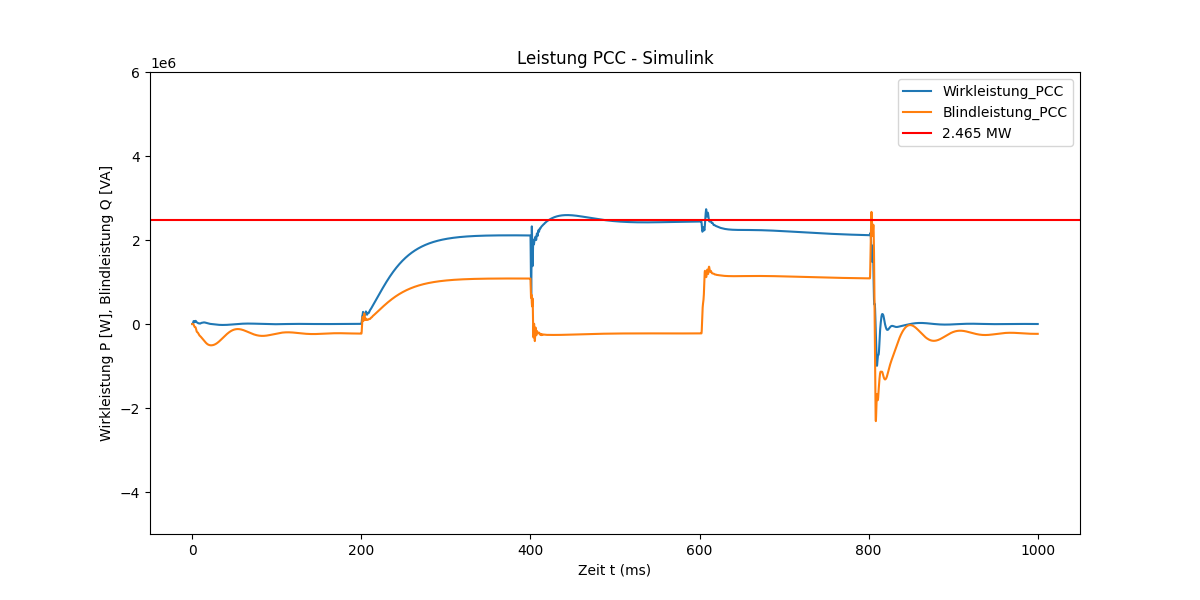

In [23]:
plt.figure(figsize=(12,6))
plt.title('Leistung PCC - Simulink')
plt.xlabel('Zeit t (ms)')
plt.ylabel('Wirkleistung P [W], Blindleistung Q [VA]')
for ts_name, ts_obj  in ts_dpsim_simulink.items():
    if ts_name in ['Blindleistung_PCC','Wirkleistung_PCC']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =2465000, color = 'r', linestyle = '-', label='2.465 MW')
plt.ylim(-5e6, 6e6)
plt.legend()
plt.show()

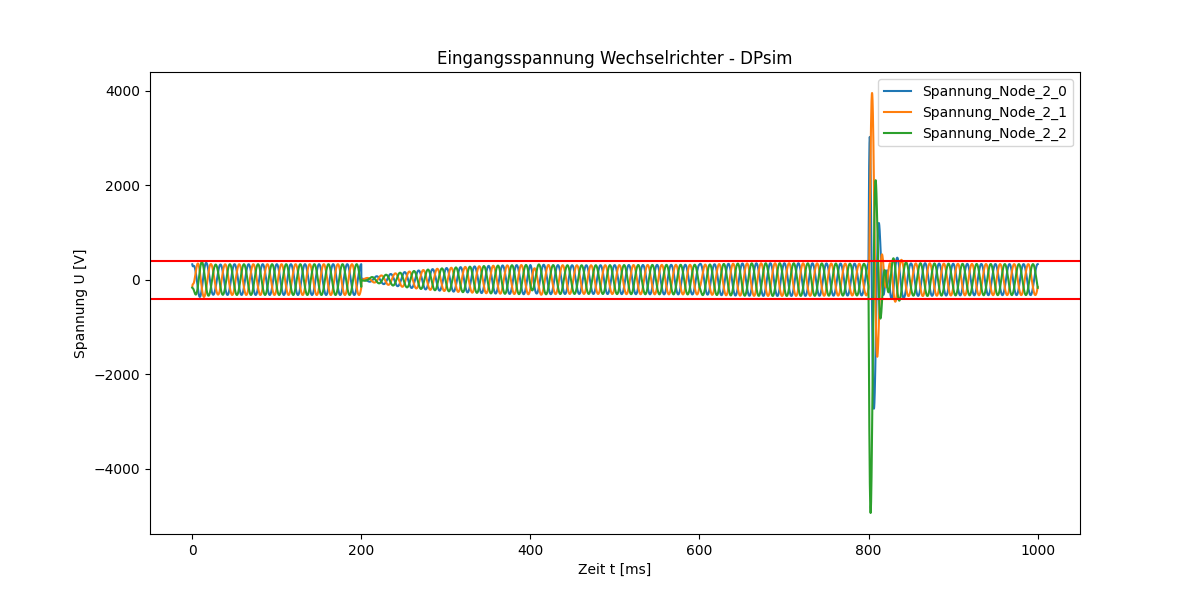

In [25]:
plt.figure(figsize=(12,6))
plt.title('Eingangsspannung Wechselrichter - DPsim')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Spannung U [V]')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['Spannung_Node_2_0','Spannung_Node_2_1','Spannung_Node_2_2']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =400, color = 'r', linestyle = '-')
plt.axhline(y =-400, color = 'r', linestyle = '-')
plt.legend()
plt.show()